In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
print("La data tiene: ", df.shape[0], " filas y ", df.shape[1], " columnas")

La data tiene:  145460  filas y  23  columnas


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
tipos_de_datos = df.dtypes

# Filtrar las columnas numéricas y categóricas
variables_numericas = tipos_de_datos[tipos_de_datos != 'object'].index
variables_categoricas = tipos_de_datos[tipos_de_datos == 'object'].index

print("Variables numéricas:")
print(variables_numericas)

print("\nVariables categóricas:")
print(variables_categoricas)

Variables numéricas:
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

Variables categóricas:
Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [37]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [11]:
# Elimnar columnas que no se van a utilizar

columnas_a_eliminar = ['Date', 'Location', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 
                       'WindSpeed3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 
                       'Cloud3pm']

# Eliminar las columnas
df = df.drop(columns=columnas_a_eliminar)

# Verificar el DataFrame resultante
print(df)


        MinTemp  MaxTemp  Rainfall  Humidity9am  Humidity3pm  Temp9am  \
0          13.4     22.9       0.6         71.0         22.0     16.9   
1           7.4     25.1       0.0         44.0         25.0     17.2   
2          12.9     25.7       0.0         38.0         30.0     21.0   
3           9.2     28.0       0.0         45.0         16.0     18.1   
4          17.5     32.3       1.0         82.0         33.0     17.8   
...         ...      ...       ...          ...          ...      ...   
145455      2.8     23.4       0.0         51.0         24.0     10.1   
145456      3.6     25.3       0.0         56.0         21.0     10.9   
145457      5.4     26.9       0.0         53.0         24.0     12.5   
145458      7.8     27.0       0.0         51.0         24.0     15.1   
145459     14.9      NaN       0.0         62.0         36.0     15.0   

        Temp3pm RainToday RainTomorrow  
0          21.8        No           No  
1          24.3        No           No  


In [12]:
df.head()

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,71.0,22.0,16.9,21.8,No,No
1,7.4,25.1,0.0,44.0,25.0,17.2,24.3,No,No
2,12.9,25.7,0.0,38.0,30.0,21.0,23.2,No,No
3,9.2,28.0,0.0,45.0,16.0,18.1,26.5,No,No
4,17.5,32.3,1.0,82.0,33.0,17.8,29.7,No,No


In [13]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [15]:
df.shape

(145460, 9)

In [16]:
tipos_de_datos = df.dtypes

# Filtrar las columnas numéricas y categóricas
variables_numericas = tipos_de_datos[tipos_de_datos != 'object'].index
variables_categoricas = tipos_de_datos[tipos_de_datos == 'object'].index

print("Variables numéricas:")
print(variables_numericas)

print("\nVariables categóricas:")
print(variables_categoricas)

Variables numéricas:
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

Variables categóricas:
Index(['RainToday', 'RainTomorrow'], dtype='object')


In [17]:
# codificar las variables categóricas cono valores 1 y 0
df = pd.get_dummies(df, drop_first=True)


In [19]:
df.head()

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,13.4,22.9,0.6,71.0,22.0,16.9,21.8,False,False
1,7.4,25.1,0.0,44.0,25.0,17.2,24.3,False,False
2,12.9,25.7,0.0,38.0,30.0,21.0,23.2,False,False
3,9.2,28.0,0.0,45.0,16.0,18.1,26.5,False,False
4,17.5,32.3,1.0,82.0,33.0,17.8,29.7,False,False


In [20]:
df.isnull().sum()

MinTemp             1485
MaxTemp             1261
Rainfall            3261
Humidity9am         2654
Humidity3pm         4507
Temp9am             1767
Temp3pm             3609
RainToday_Yes          0
RainTomorrow_Yes       0
dtype: int64

In [21]:
# interpolacion para valores nulos
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
df[columnas_numericas] = df[columnas_numericas].interpolate(method='linear', axis=0)

In [22]:
df.isnull().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Humidity9am         0
Humidity3pm         0
Temp9am             0
Temp3pm             0
RainToday_Yes       0
RainTomorrow_Yes    0
dtype: int64

In [23]:
df.duplicated().sum()

0

In [24]:
df.MinTemp.value_counts()

MinTemp
11.000000    903
10.200000    900
9.600000     897
10.500000    886
10.800000    873
            ... 
17.367152      1
17.360499      1
17.353846      1
17.347193      1
26.350000      1
Name: count, Length: 1502, dtype: int64

In [25]:
df.MaxTemp.value_counts()

MaxTemp
20.000000    885
19.000000    843
19.800000    840
20.400000    834
19.900000    825
            ... 
23.169917      1
23.155602      1
23.141286      1
23.126971      1
35.150000      1
Name: count, Length: 1476, dtype: int64

In [26]:
# verificar normalizacion 
columnas_numericas = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']

# Calcula el rango de valores para cada variable numérica
rango_valores = df[columnas_numericas].max() - df[columnas_numericas].min()

# Muestra el rango de valores de cada variable
print("Rango de valores de cada variable:")
print(rango_valores)


Rango de valores de cada variable:
MinTemp         42.4
MaxTemp         52.9
Rainfall       371.0
Humidity9am    100.0
Humidity3pm    100.0
Temp9am         47.4
Temp3pm         52.1
dtype: float64


In [27]:
from sklearn.preprocessing import MinMaxScaler

# Inicializa el scaler
scaler = MinMaxScaler()

# Normaliza las columnas numéricas
df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])

# Verifica el DataFrame después de la normalización
print(df)


         MinTemp   MaxTemp  Rainfall  Humidity9am  Humidity3pm   Temp9am  \
0       0.516509  0.523629  0.001617         0.71         0.22  0.508439   
1       0.375000  0.565217  0.000000         0.44         0.25  0.514768   
2       0.504717  0.576560  0.000000         0.38         0.30  0.594937   
3       0.417453  0.620038  0.000000         0.45         0.16  0.533755   
4       0.613208  0.701323  0.002695         0.82         0.33  0.527426   
...          ...       ...       ...          ...          ...       ...   
145455  0.266509  0.533081  0.000000         0.51         0.24  0.364979   
145456  0.285377  0.568998  0.000000         0.56         0.21  0.381857   
145457  0.327830  0.599244  0.000000         0.53         0.24  0.415612   
145458  0.384434  0.601134  0.000000         0.51         0.24  0.470464   
145459  0.551887  0.601134  0.000000         0.62         0.36  0.468354   

         Temp3pm  RainToday_Yes  RainTomorrow_Yes  
0       0.522073          False    

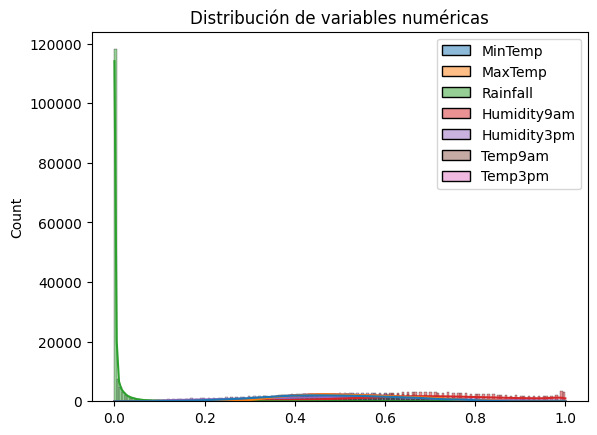

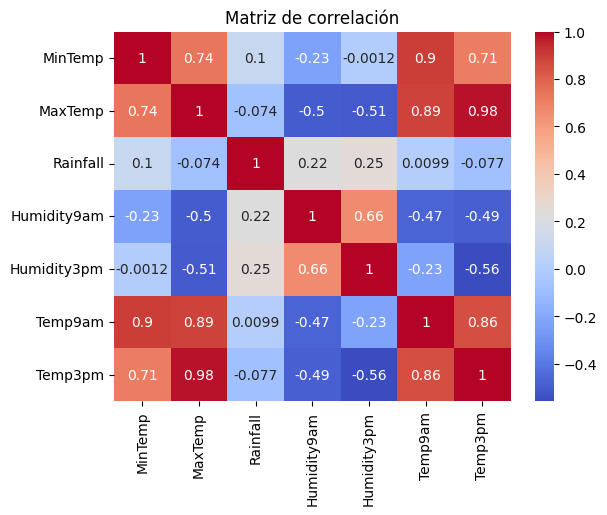

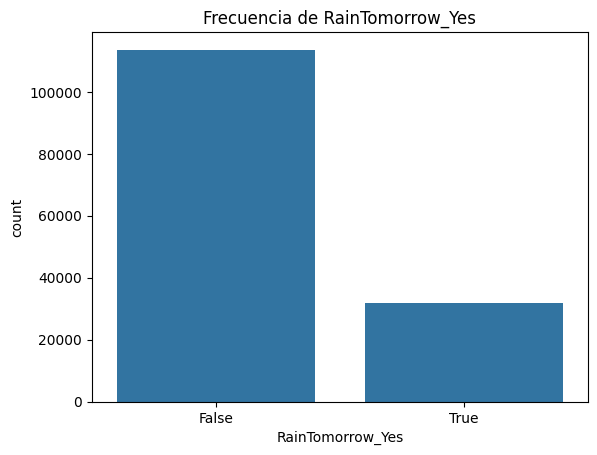

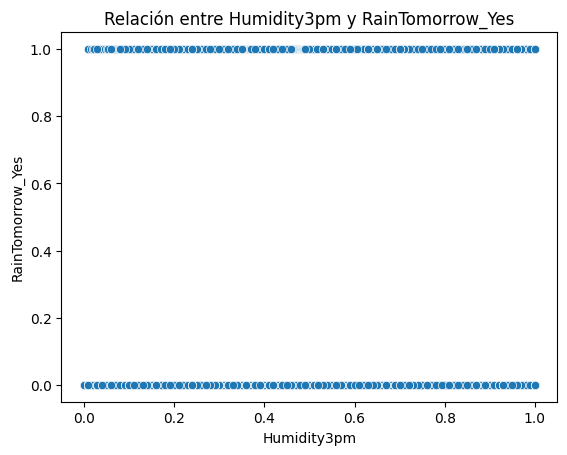

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogramas de variables numéricas
sns.histplot(df[columnas_numericas], kde=True)
plt.title('Distribución de variables numéricas')
plt.show()

# Matriz de correlación
correlation_matrix = df[columnas_numericas].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

# Relación entre variables categóricas y la variable objetivo
sns.countplot(x='RainTomorrow_Yes', data=df)
plt.title('Frecuencia de RainTomorrow_Yes')
plt.show()

# Relación entre variables numéricas y la variable objetivo
sns.scatterplot(x='Humidity3pm', y='RainTomorrow_Yes', data=df)
plt.title('Relación entre Humidity3pm y RainTomorrow_Yes')
plt.show()


(array([   0,    1,    2, ..., 1471, 1472, 1473]),
 [Text(0, 0, '0.45990566037735847'),
  Text(1, 0, '0.4410377358490566'),
  Text(2, 0, '0.42688679245283023'),
  Text(3, 0, '0.4481132075471699'),
  Text(4, 0, '0.45518867924528306'),
  Text(5, 0, '0.41273584905660377'),
  Text(6, 0, '0.4363207547169812'),
  Text(7, 0, '0.4834905660377359'),
  Text(8, 0, '0.4103773584905661'),
  Text(9, 0, '0.5070754716981133'),
  Text(10, 0, '0.4457547169811321'),
  Text(11, 0, '0.42924528301886794'),
  Text(12, 0, '0.46698113207547176'),
  Text(13, 0, '0.4716981132075472'),
  Text(14, 0, '0.47877358490566047'),
  Text(15, 0, '0.4575471698113208'),
  Text(16, 0, '0.4009433962264151'),
  Text(17, 0, '0.5'),
  Text(18, 0, '0.4693396226415095'),
  Text(19, 0, '0.4929245283018868'),
  Text(20, 0, '0.47405660377358494'),
  Text(21, 0, '0.5117924528301887'),
  Text(22, 0, '0.41981132075471705'),
  Text(23, 0, '0.4882075471698113'),
  Text(24, 0, '0.4316037735849057'),
  Text(25, 0, '0.42216981132075476'),
  

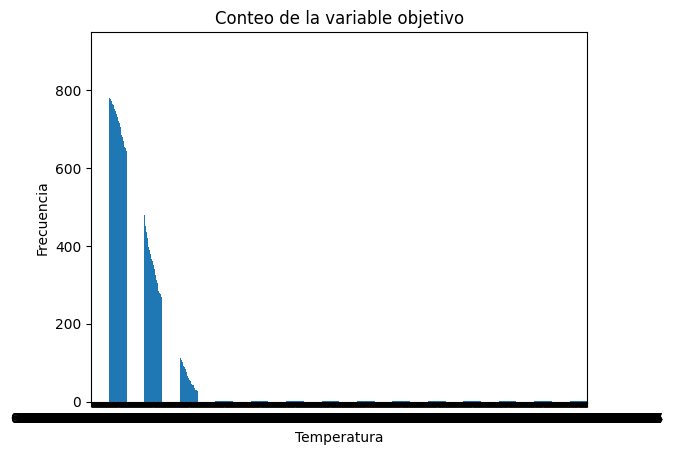

In [29]:
df.MinTemp.value_counts().plot(kind="bar")

plt.title("Conteo de la variable objetivo")
plt.xlabel("Temperatura")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)

(array([   0,    1,    2, ..., 1461, 1462, 1463]),
 [Text(0, 0, '0.46880907372400754'),
  Text(1, 0, '0.44990548204158787'),
  Text(2, 0, '0.46502835538752363'),
  Text(3, 0, '0.47637051039697537'),
  Text(4, 0, '0.46691871455576556'),
  Text(5, 0, '0.4839319470699433'),
  Text(6, 0, '0.45935727788279773'),
  Text(7, 0, '0.44045368620037806'),
  Text(8, 0, '0.4877126654064272'),
  Text(9, 0, '0.43478260869565216'),
  Text(10, 0, '0.47258979206049145'),
  Text(11, 0, '0.4480151228733459'),
  Text(12, 0, '0.4612476370510397'),
  Text(13, 0, '0.4574669187145557'),
  Text(14, 0, '0.4914933837429111'),
  Text(15, 0, '0.44612476370510395'),
  Text(16, 0, '0.5633270321361059'),
  Text(17, 0, '0.43100189035916825'),
  Text(18, 0, '0.4120982986767486'),
  Text(19, 0, '0.4706994328922495'),
  Text(20, 0, '0.5103969754253308'),
  Text(21, 0, '0.4385633270321361'),
  Text(22, 0, '0.4272211720226843'),
  Text(23, 0, '0.5160680529300568'),
  Text(24, 0, '0.5066162570888468'),
  Text(25, 0, '0.453686

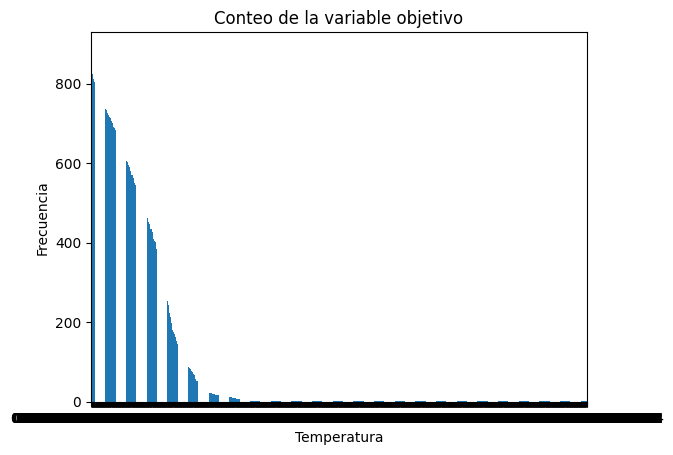

In [30]:
df.MaxTemp.value_counts().plot(kind="bar")

plt.title("Conteo de la variable objetivo")
plt.xlabel("Temperatura")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)

C:\Users\HP\AppData\Local\Temp\ipykernel_1588\1475822537.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 0], data=df, y='MinTemp', x=None, palette="Set1")
C:\Users\HP\AppData\Local\Temp\ipykernel_1588\1475822537.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(ax=axes[0, 1], data=df, x='MinTemp', palette="Set1")
C:\Users\HP\AppData\Local\Temp\ipykernel_1588\1475822537.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1, 0], data=df, y='MaxTemp', x=None, palette="Set1")
C:\Users\HP\AppData\Local\Temp\ipykernel_1588\1475822537.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.h

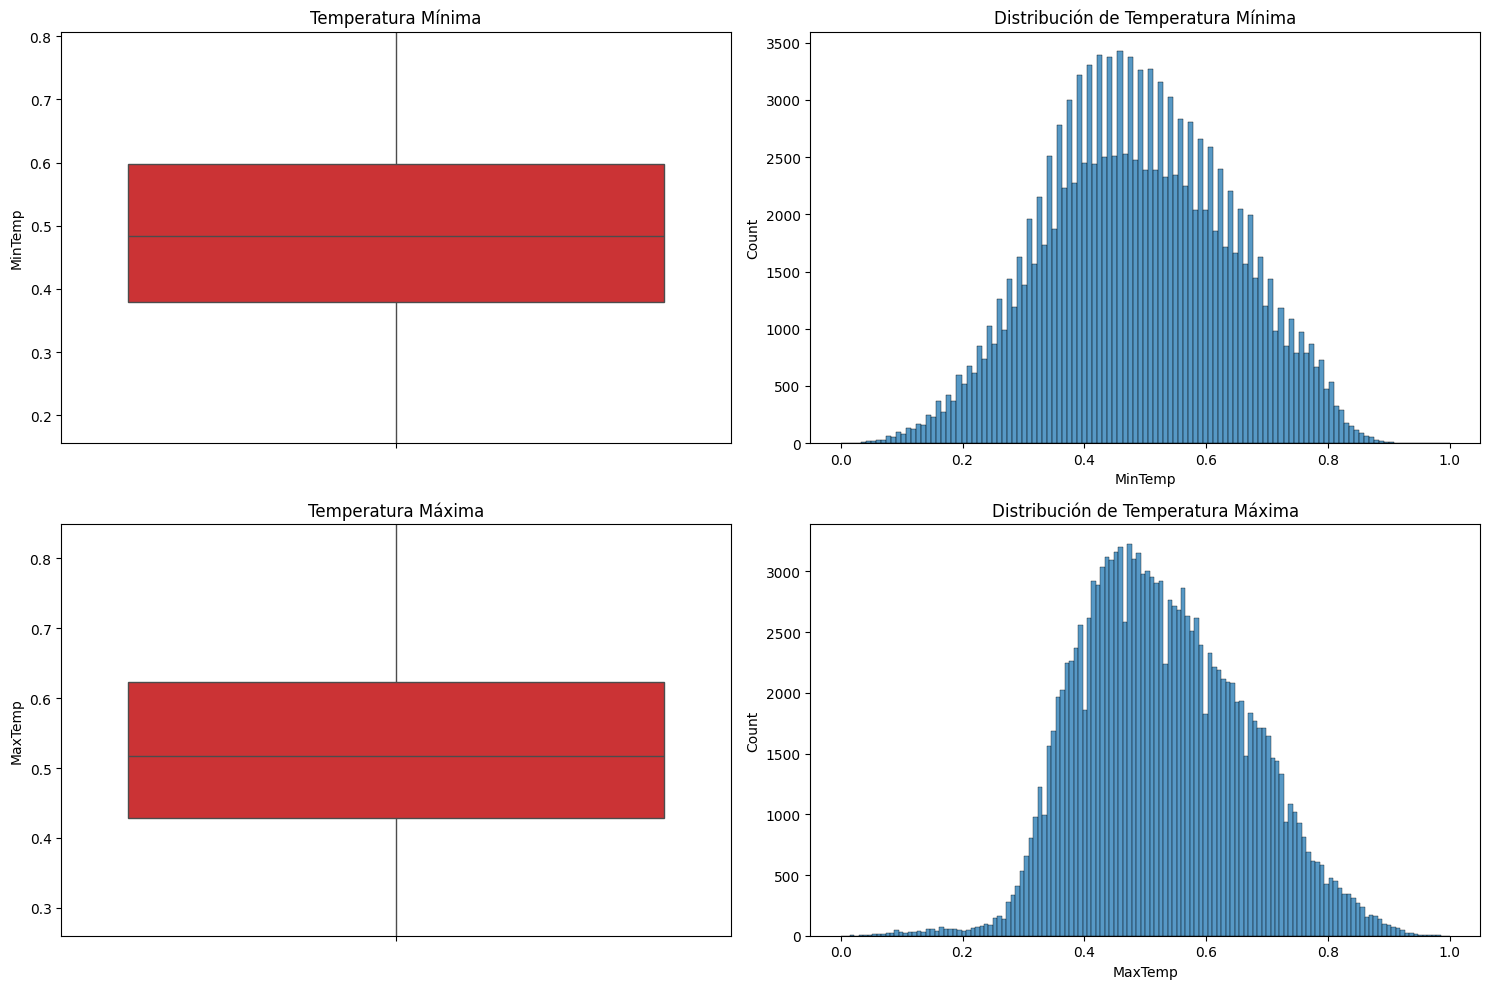

In [31]:


fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Un diagrama de caja y bigote en la primera parcela sobre la variable MinTemp
sns.boxplot(ax=axes[0, 0], data=df, y='MinTemp', x=None, palette="Set1")
axes[0, 0].set_title("Temperatura Mínima")

# Ajustar límites del eje y para MinTemp
ylim_min, ylim_max = df['MinTemp'].quantile([0.01, 0.99])
axes[0, 0].set_ylim(ylim_min, ylim_max)

# Un histograma en la segunda parcela sobre la variable MinTemp
sns.histplot(ax=axes[0, 1], data=df, x='MinTemp', palette="Set1")
axes[0, 1].set_title("Distribución de Temperatura Mínima")

# Un diagrama de caja y bigote en la tercera parcela sobre la variable MaxTemp
sns.boxplot(ax=axes[1, 0], data=df, y='MaxTemp', x=None, palette="Set1")
axes[1, 0].set_title("Temperatura Máxima")

# Ajustar límites del eje y para MaxTemp
ylim_min, ylim_max = df['MaxTemp'].quantile([0.01, 0.99])
axes[1, 0].set_ylim(ylim_min, ylim_max)

# Un histograma en la cuarta parcela sobre la variable MaxTemp
sns.histplot(ax=axes[1, 1], data=df, x='MaxTemp', palette="Set1")
axes[1, 1].set_title("Distribución de Temperatura Máxima")

plt.tight_layout()
plt.show()

In [32]:
df.head()

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,0.516509,0.523629,0.001617,0.71,0.22,0.508439,0.522073,False,False
1,0.375000,0.565217,0.000000,0.44,0.25,0.514768,0.570058,False,False
2,0.504717,0.576560,0.000000,0.38,0.30,0.594937,0.548944,False,False
3,0.417453,0.620038,0.000000,0.45,0.16,0.533755,0.612284,False,False
4,0.613208,0.701323,0.002695,0.82,0.33,0.527426,0.673704,False,False


In [33]:
df.tail()

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
145455,0.266509,0.533081,0.0,0.51,0.24,0.364979,0.533589,False,False
145456,0.285377,0.568998,0.0,0.56,0.21,0.381857,0.573896,False,False
145457,0.327830,0.599244,0.0,0.53,0.24,0.415612,0.604607,False,False
145458,0.384434,0.601134,0.0,0.51,0.24,0.470464,0.602687,False,False
145459,0.551887,0.601134,0.0,0.62,0.36,0.468354,0.504798,False,False


ValueError: Could not interpret value `RainTomorrow` for `x`. An entry with this name does not appear in `data`.

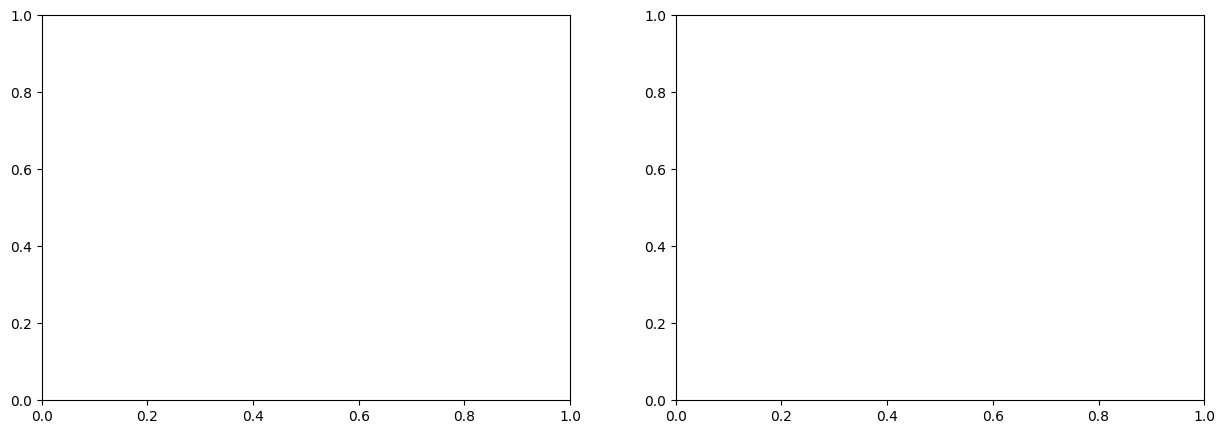

In [34]:

fig, axes = plt.subplots(1,2 , figsize = (15,5))
sns.countplot(ax=axes[0], x = "RainTomorrow_Yes", data = df)
axes[0].set_title("Frecuencia de que llueva mañana ")
axes[0].set_xlabel("LLuvia") 
axes[0].set_ylabel("Cantidad")

sns.countplot(ax=axes[1], x = "RainTomorrow_Yes", hue = 'RainToday_Yes', data = df, palette="magma")
axes[1].set_title("Frecuencias de lluvia mañana y lluvia hoy")
axes[1].set_xlabel("LLuvia") 
axes[1].set_ylabel("Cantidad")



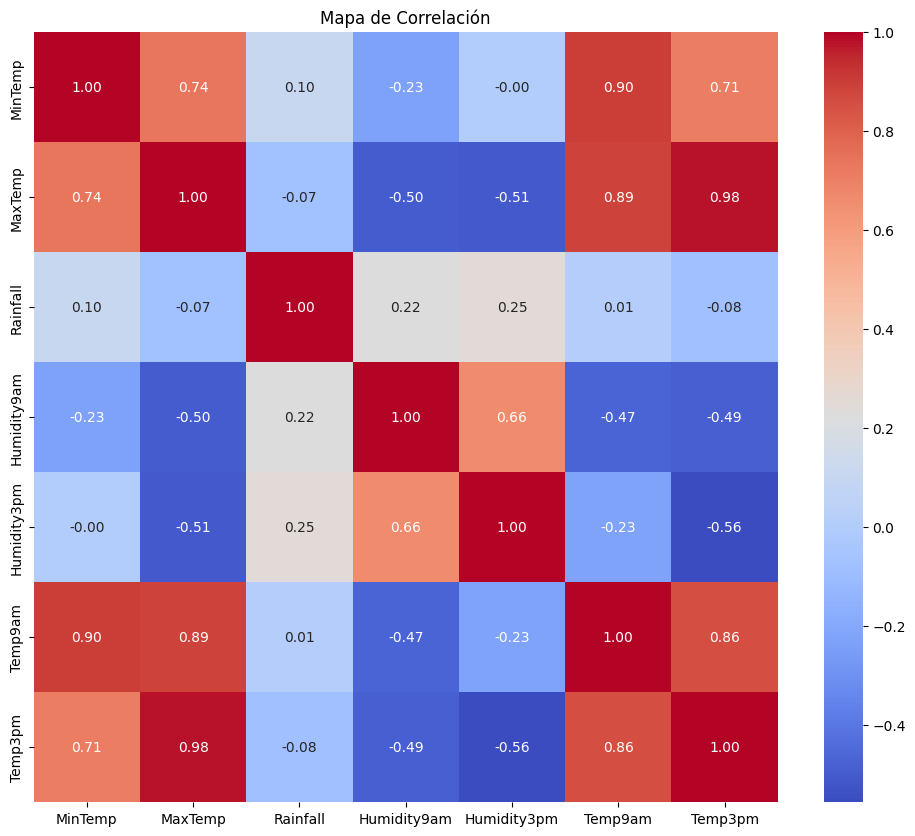

In [35]:
# Excluir columnas no numéricas del cálculo de correlación
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular la correlación entre las variables numéricas
correlation_matrix = numeric_df.corr()

# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Visualizar el mapa de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlación')
plt.show()



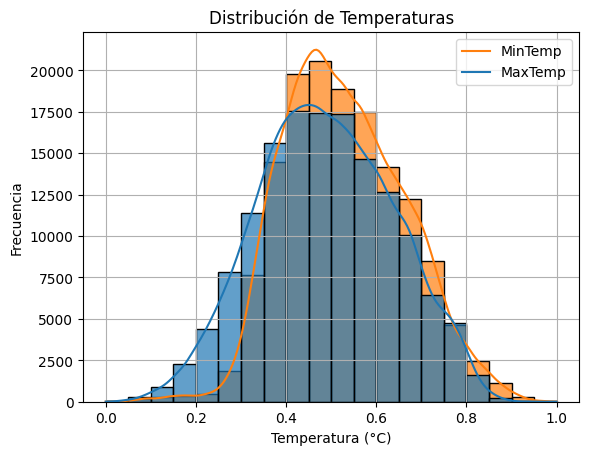

In [36]:
# Visualización 1: Histograma de distribución de temperaturas
plt.figure()
sns.histplot(df[['MinTemp', 'MaxTemp']], bins=20, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribución de Temperaturas')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.legend(['MinTemp', 'MaxTemp'])
plt.grid(True)

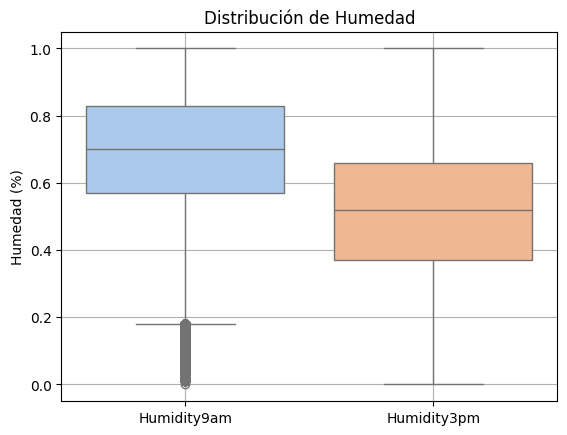

In [37]:
# Visualización 2: Boxplot de Humedad
plt.figure()
sns.boxplot(data=df[['Humidity9am', 'Humidity3pm']], palette='pastel')
plt.title('Distribución de Humedad')
plt.ylabel('Humedad (%)')
plt.grid(True)
plt.show()

In [38]:
df.head()

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,0.516509,0.523629,0.001617,0.71,0.22,0.508439,0.522073,False,False
1,0.375000,0.565217,0.000000,0.44,0.25,0.514768,0.570058,False,False
2,0.504717,0.576560,0.000000,0.38,0.30,0.594937,0.548944,False,False
3,0.417453,0.620038,0.000000,0.45,0.16,0.533755,0.612284,False,False
4,0.613208,0.701323,0.002695,0.82,0.33,0.527426,0.673704,False,False
